C:\Users\mtand\AppData\Local\Temp\ipykernel_9792\3857633132.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2018-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


📊 Sample Data:
Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2018-01-02  40.380989  40.390368  39.677733  39.888712  102223600
2018-01-03  40.373959  40.917812  40.310668  40.444285  118071600
2018-01-04  40.561493  40.664638  40.338796  40.446626   89738400
2018-01-05  41.023296  41.110030  40.566180  40.657604   94640000
2018-01-08  40.870934  41.166300  40.772474  40.870934   82271200

📊 Processed Data:
Price           Close     Target
Ticker           AAPL           
Date                            
2018-01-02  40.380989  40.373959
2018-01-03  40.373959  40.561493
2018-01-04  40.561493  41.023296
2018-01-05  41.023296  40.870934
2018-01-08  40.870934  40.866257

✅ Model Evaluation:
Mean Squared Error: 7.217668513587703
R² Score: 0.9883748480002912


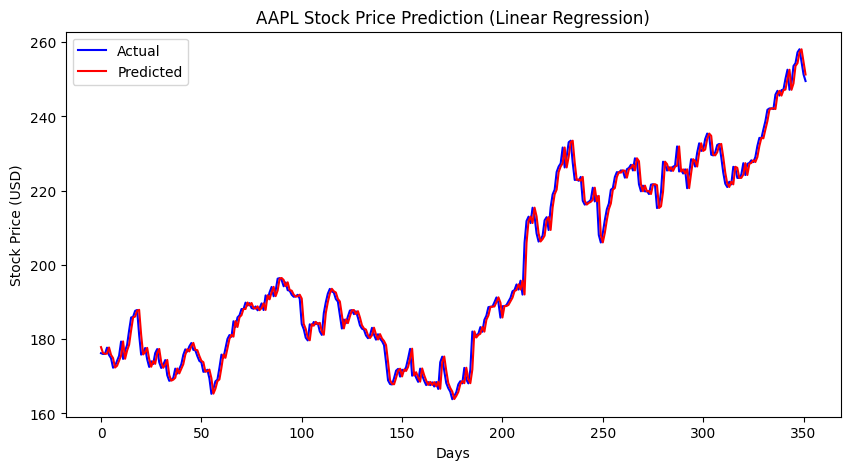


💾 Model saved as stock_model.pkl

📈 Last Closing Price: Ticker
AAPL    251.307861
Name: 2024-12-30 00:00:00, dtype: float64
📉 Predicted Next Price: 251.29654555829939


In [2]:
!pip install yfinance
# 📌 Stock Price Predictor using Yahoo Finance + Linear Regression

# STEP 1: Import Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle

# STEP 2: Fetch Stock Data (Example: Apple)
ticker =input("Enter stock ticker symbol (e.g., AAPL, TSLA, MSFT): ")  # you can change this to any stock symbol, e.g., "TSLA", "MSFT"
df = yf.download(ticker, start="2018-01-01", end="2025-01-01")

print("📊 Sample Data:")
print(df.head())

# STEP 3: Preprocess Data
df = df[['Close']].copy()
df['Target'] = df['Close'].shift(-1)  # Next day's closing price
df.dropna(inplace=True)

print("\n📊 Processed Data:")
print(df.head())

# STEP 4: Train-Test Split
X = df[['Close']]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)
# STEP 5: Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# STEP 6: Predictions
y_pred = model.predict(X_test)

# STEP 7: Evaluate Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n✅ Model Evaluation:")
print("Mean Squared Error:", mse)
print("R² Score:", r2)

# STEP 8: Plot Actual vs Predicted
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual", color='blue')
plt.plot(y_pred, label="Predicted", color='red')
plt.title(f"{ticker} Stock Price Prediction (Linear Regression)")
plt.xlabel("Days")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()

# STEP 9: Save Model
with open("stock_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("\n💾 Model saved as stock_model.pkl")

# STEP 10: Example Prediction
latest_price = df['Close'].iloc[-1]
predicted_price = model.predict(np.array([[latest_price]]).reshape(-1, 1))

print(f"\n📈 Last Closing Price: {latest_price}")
print(f"📉 Predicted Next Price: {predicted_price[0]}")



